Data Sources:

CDC:
 2017-2019 (National Survey of Family Growth)
https://www.cdc.gov/nchs/data/nsfg/2017-2019_NSFG_FemResp_SectionE_Codebook-508.pdf
WebCode has been discontinued as of 2020 :( SO had to go through raw data manually.
#Contraception Data
https://www.cdc.gov/nchs/data/databriefs/db388-tables-508.pdf#page=2

#IUD failure rate data
https://www.ohsu.edu/sites/default/files/2020-01/Comparison%20between%20two%2052mg%20levonorgestrel-releasing%20intrauterine%20systems%20Liletta%20and%20Mirena.pdf

https://www.fsrh.org/documents/fsrh-ceu-new-product-review-kyleena-january-2018/
#Abortion Care Data


An unintended pregnancy is one that
occurred when a woman wanted to
become pregnant in the future but
not at the time she became pregnant
(“wanted later”) or one that occurred
when she did not want to become pregnant then or at any time in the future
(“unwanted”). In this fact sheet, births
resulting from unintended pregnancies
are referred to as “unplanned.” - Guttmacher Institute



In [172]:
## Female Respondent File Codebook - made csv of relevant data
##import csv file info

import requests
import pandas as pd

df = pd.read_csv('NSFG.csv')
df.columns = [c.lower().replace(' ', '_') for c in df.columns]

df.rename(columns = {'birth_control_methods':'method','percent(%)':'percent','across_population_(females_15-49)':"num_in_pop",'estimated_unintended_pregnancies_':'est_unplnd_prg','planned_pregnancies':'plnd_prg'}, inplace=True)
#wanted to make each pregnancy I extrapolated that of a whole person but could intially not do int(x) for the string of 'NaN' 
#learned apply function on StackedOverflow
#Source: https://stackoverflow.com/questions/44061607/pandas-lambda-function-with-nan-support
df['est_unplnd_prg']=df['est_unplnd_prg'].apply(lambda x : int(x) if pd.notna(x) else x)




<Axes: >

<Figure size 640x480 with 0 Axes>

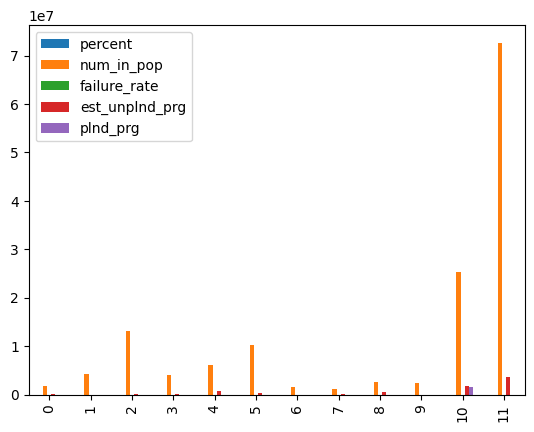

In [184]:
import matplotlib
from matplotlib import pyplot as plt    
import numpy as np

fig1 = plt.figure()
df

#First Map: Stacked Bar chart of population compared to amount of unplanned pregnancies indexed by method
df.plot(kind='bar')


In [17]:
#Second Graph: Not on contraception - bar graph of population next to stack of unplanned vs planned pregnancies


#Third Graph: Total expected pregnancies based off NSFG survey compared to 2018 Birth rate, miscarriage rate, abortion rate - show gap can be attributed to undercounting of abortions as most states do not report to CDC (get stat on this)


In [165]:
#needed to rename my terrible csv files
df1 = pd.read_csv("IUD_fail_per_1000.csv")
df1.rename(columns = {'IUD':'iud_type','Year 1':'y1','Year 3 (cumulative)':'y3','Year 5 (cumulative)':'y5','Year 8 (cumulative)':'y8','Year 10 (cumulative':'y10'}, inplace=True)
#df1['per 1,000 women']= df['y']

df1




,iud_type,y1,y3,y5,y8,y10
0,Copper,6.0,8.0,14.0,NaN,22.0
1,Mirena,2.0,1.0,7.0,6.8,NaN
2,Skyla,4.0,9.0,NaN,NaN,NaN
3,Liletta,5.0,NaN,10.0,NaN,NaN
4,Kyleena,1.6,NaN,14.0,NaN,NaN


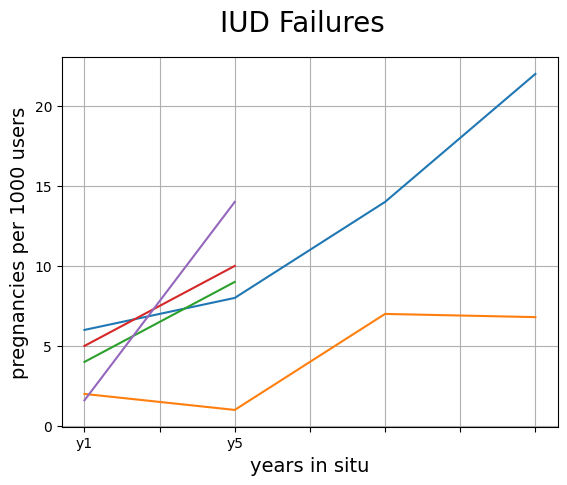

In [167]:
#Fourth Graph: Show amount of IUD failures based of varying efficacy of different brands
#Show that efficacy over longer periods of time decreases

fig = plt.figure()

#I wanted to graph but ran into trouble with 'NaN values so used the dropna() function (googled it because I figured there was opposite to isna) to ignore them and the transpose to do each column as a line instead of each row
for c in df1['iud_type']:
    df1.set_index('iud_type').transpose()[c].dropna().plot()

plt.suptitle('IUD Failures', fontsize=20)
plt.xlabel('years in situ', fontsize=14)
plt.ylabel('pregnancies per 1000 users', fontsize=14)

plt.grid()
plt.tick_params()




Now to tie this into abortion access - I don't have the geographic data of people in NSFG because it was deemed a privacy concern by the CDC

However can use 2019 Census data (aware out of date but matches my dataset) to find percentage of population of women 15-49 who live in each state and * percent data * then *failure rate * overall census data 2019 and then see what percent of those women will no longer have access to abortion in-state. Can also divide figure by state facility numbers if not 0 to see which would be the most overwhelmed by unplanned pregnancies (estimated to make up 90% of abortions) instead of what the ANSIRH looks at which is total number of women of reproductive age per facility. Should also add in the amount of unplanned pregnancies from no contraception to get a full picture.


In [ ]:
#Step One create new data frame of unplanned pregnancies by state
import math
df3 = pd.read_csv("Abortion_care.csv")
#OMG THERE ARE COMMAS GET RID
#Source: https://stackoverflow.com/questions/56947333/how-to-remove-commas-from-all-the-column-in-pandas-at-once

for x in df3.columns:
    if x.startswith('Num-') and x != 'Num-2022':
        df3[x]=df3[x].str.replace(',','')

#make separate df with regions and make this one only states
df3_regions=df3[df3['State'].str.contains("Region")]


df3_states = df3[~df3['State'].str.contains("Region", na=False)]


#Ok now create column of population of each state
df3_states
df3_states['population']=df3_states['Num-2021'].astype(int)*df3_states['F2021']

#ok now estimate how many unplanned pregnancies will happen in each state
df3_states['population']
df3_states['unplanned_estimate']=(df3_states['population']*unplnd_prg_odds).astype(int)
#now estimate how many unplanned pregnancies per clinic
#OH NO BC OF DODD CASE THERE ARE ZERO CLINICS IN MANY MANY STATES (THAT'S INSANE WTF AMERICA?) Do if statement to allow analysis
df3_states['unplanned_prgs_per_clinic']=(df3_states['unplanned_estimate']/df3_states['F2022']).apply(lambda x: int(x) if not math.isinf(x) else x)


df3_states.to_csv(r'/Users/julieiles/Desktop/Lede/GitHub/BC_failure/Abortion_access.csv', index=False)
